In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.stats import spearmanr
import scipy.stats as stats
from scipy.stats import kstest, norm

pd.options.display.max_rows = 100

df = pd.read_csv(r'file:///Users/kaan/Desktop/Data_Melbourne_Housing_FULL.csv')

In [7]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [14]:
df.dropna(subset=["Price"], inplace=True)
df["Price"] = df["Price"].astype(int)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [15]:
old_value = 34857
new_value = 27247

percentage_change = ((new_value - old_value) / old_value) * 100

print("Percentage Change:", percentage_change)


Percentage Change: -21.83205668875692


In [17]:
value_counts = df['Type'].value_counts()
value_counts

h    18472
u     5909
t     2866
Name: Type, dtype: int64

In [18]:
count_h = 18472
total_count = 18472 + 5909 + 2866

percentage_h = (count_h / total_count) * 100

print("Percentage of 'h':", percentage_h)

Percentage of 'h': 67.79461959114765


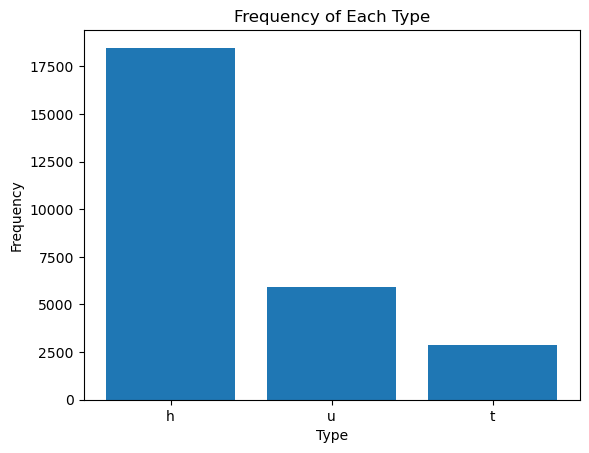

In [19]:
type_counts = df['Type'].value_counts()

plt.bar(type_counts.index, type_counts.values)


plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Type')


plt.show()

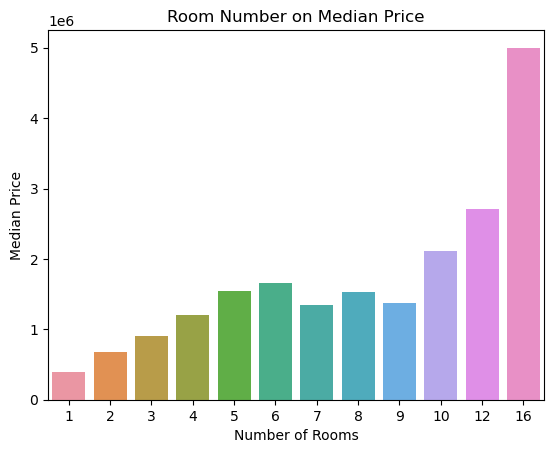

In [22]:
median_prices = df.groupby('Rooms')['Price'].median().reset_index()

sns.barplot(data=median_prices, x='Rooms', y='Price')


plt.xlabel('Number of Rooms')
plt.ylabel('Median Price')
plt.title('Room Number on Median Price')

plt.show()

In [25]:
correlation_coefficient, p_value = spearmanr(df['Rooms'], df['Price'])

print("Spearman Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Spearman Correlation Coefficient: nan
p-value: nan


In [26]:
correlation_coefficient = df['Landsize'].corr(df['Price'])

print("Pearson Correlation Coefficient:", correlation_coefficient)

Pearson Correlation Coefficient: 0.03274836524947045


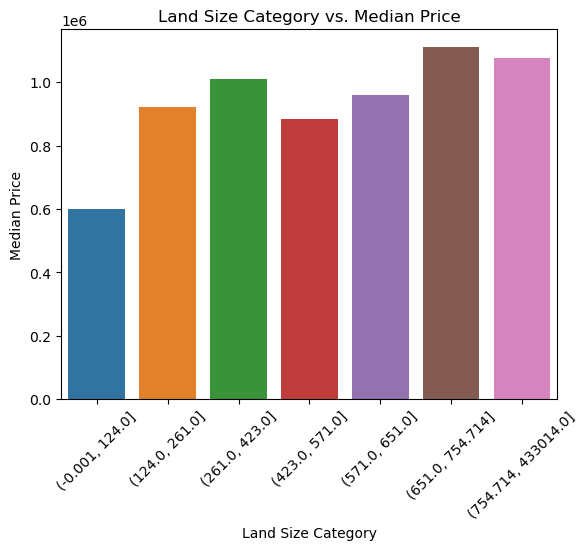

In [27]:
df['Landsize_Category'] = pd.qcut(df['Landsize'], q=7)


median_prices = df.groupby('Landsize_Category')['Price'].median().reset_index()


sns.barplot(data=median_prices, x='Landsize_Category', y='Price')


plt.xlabel('Land Size Category')
plt.ylabel('Median Price')
plt.title('Land Size Category vs. Median Price')


plt.xticks(rotation=45)


plt.show()

In [30]:
threshold = 1.5


Q1 = df['Landsize'].quantile(0.25)
Q3 = df['Landsize'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR


outliers_count = ((df['Landsize'] < lower_bound) | (df['Landsize'] > upper_bound)).sum()


percentage_outliers = outliers_count / len(df) * 100

print("Percentage of Outliers:", percentage_outliers)


Percentage of Outliers: 1.7041053446940357


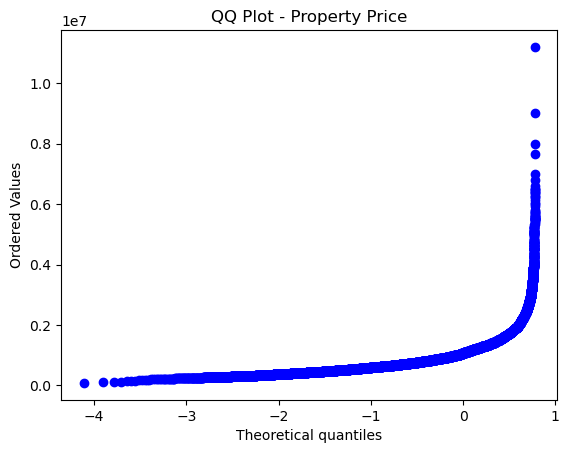

Skewness: 2.5889693410528607
Kurtosis: 13.09720051555638


In [33]:
stats.probplot(df['Price'], dist='norm', plot=plt)
plt.title('QQ Plot - Property Price')


plt.show()


skewness = df['Price'].skew()
kurtosis = df['Price'].kurtosis()

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


In [36]:
test_statistic, p_value = kstest(df['Price'], cdf='norm')


alpha = 0.05


print("Kolmogorov-Smirnov Test Statistic:", test_statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("The distribution of property prices is not significantly different from a normal distribution.")
else:
    print("The distribution of property prices is significantly different from a normal distribution.")


Kolmogorov-Smirnov Test Statistic: nan
p-value: nan
The distribution of property prices is significantly different from a normal distribution.


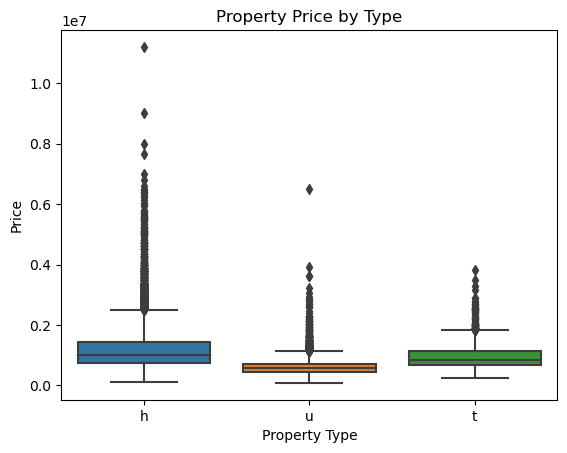

In [37]:
sns.boxplot(data=df, x='Type', y='Price')

plt.title('Property Price by Type')
plt.xlabel('Property Type')
plt.ylabel('Price')

plt.show()


In [38]:
median_prices = df.groupby('Regionname')['Price'].median()

highest_median_region = median_prices.idxmax()
lowest_median_region = median_prices.idxmin()

print("Region with the highest median price:", highest_median_region)
print("Region with the lowest median price:", lowest_median_region)

Region with the highest median price: Southern Metropolitan
Region with the lowest median price: Western Victoria


In [39]:
contingency_table = pd.crosstab(df['Regionname'], df['Price'])


chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)


n_rows = contingency_table.shape[0]
n_cols = contingency_table.shape[1]


v_coefficient = np.sqrt(chi2_statistic / (n_rows * (min(n_cols, n_rows) - 1)))


print("Chi-square Test Statistic:", chi2_statistic)
print("p-value:", p_value)
print("Cramer's V Coefficient:", v_coefficient)

Chi-square Test Statistic: 25658.719637573868
p-value: 1.804092622742568e-144
Cramer's V Coefficient: 21.405406375482183
